The iPython notebook scrapes the PMF webpage that lists the current Finalists. It then appends the appointment data from that scrape to a csv file of the Finalists that is used to track appointments over time. The resulting number of appointed PMFs is then displayed in a simple plot.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
from datetime import timedelta #for accurate plotting of dates%matplotlib inline
from datetime import datetime
from bs4 import BeautifulSoup
from urllib.request import urlopen

In [2]:
df=pd.read_csv('2017_Appointments.csv',encoding = "ISO-8859-1")

This next block opens the webpage of 2017 finalists, locates the table of the finalists in the html, and for each finalists, records if they have an appointment in the dataframe df.

In [3]:
url='https://apply.pmf.gov/finalists.aspx' #url of pmf finalist webpage
html = urlopen(url); #using simple urlopen package to download webpage
bsObj = BeautifulSoup(html.read(), 'lxml'); #using BeautifulSoup to decode webpage
#this section pulls the date from the downloaded page, to be used when appending appointment record to csv file
a=bsObj.find(id='container_date').text.replace('\xa0','')
b=datetime.strptime(a,'%A, %B %d, %Y')
date=b.strftime('%y%m%d')
#this section finds the table of finalists, then the Status column and
#appends appointment status to csv file using Finalists' names as a key.
bsObj_table=bsObj.find('table',id="dataTable");
bsObj_finalists=bsObj_table.find_all('tr');
for x in range(0,len(bsObj_finalists)):
    df.loc[df.loc[:,'Name']==bsObj_finalists[x].find_all('td')[1].text,'Status_%s'%(date)]=int(
        bsObj_finalists[x].find_all('td')[5].text.replace('-','0').replace('Appointed','1'))

A simple plot of the number of appointed 2017 Finalists. (170325 crafted from memory. Might be off by a day or an appointment.)


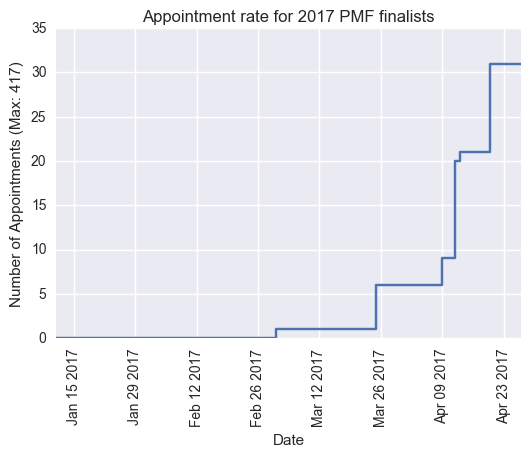

In [4]:
date=[];
count=[];
z=df.columns[df.columns.str.contains('Status')];
for x in range(0,len(z)):
    date.append(datetime.strptime(z[x][-6:],"%y%m%d"))
    count.append(417-df.loc[:,z[x]].value_counts()[0])
plt.step(date,count);
plt.title('Appointment rate for 2017 PMF finalists');
plt.ylabel('Number of Appointments (Max: 417)');
plt.xlabel('Date');
plt.xticks(rotation=90);
plt.savefig('AppointmentRates2017.png',bbox_inches='tight')

Saving the newly appended csv file.

In [5]:
df.to_csv('2017_Appointments.csv',index=False)

Current percent of 2017 Finalists listed as appointed:

In [6]:
round((df.iloc[:,-1].sum()/417*100),1)

7.4

Removing some redundant recordings. If a recording is the same as the recordings taken before and after, it will be dropped from the list that is uploaded to GitHub.

In [7]:
repeats=[]
for x in range(1,len(df.columns)-1):
    if ((df.iloc[:,x]==df.iloc[:,x-1]).all())&((df.iloc[:,x]==df.iloc[:,x+1]).all()):
        repeats.append(x)
df.drop(df.columns[repeats],axis=1,inplace=True)
df.drop('Name',axis=1,inplace=True)
df.to_csv('Appointments2017-GitHub.csv',index=False)